#### @Author: NUDT.Lizh
#### @Date:   2022-10-30 19:53:28
#### @Email:  lizihao19@nudt.edu.cn
#### @Last Modified by:   NUDT.Lizh
#### @Last Modified time: 2022-11-01 08:39:32


研0小白从0开始学习OpenCV，配合B站[计算机视觉入门到精通](https://www.bilibili.com/video/BV1EG4y1B7Wz/?p=8&share_source=copy_web&vd_source=d93bd4f728108d74e59371a593d2b10d)，[OpenCV官方文档](https://docs.opencv.org/4.x/index.html)一起食用效果更佳哦~

### 一、利用OpenCV读取和保存图片，视频

#### 读取图片

In [3]:
#导入库
import cv2 
import sys
img = cv2.imread("Ania.jpg") #读彩色图
if img is None:
    sys.exit("Could not read the image!")
cv2.imshow("Display Window",img)
k = cv2.waitKey(0)


上面是一个demo，展示的过程是读取本地Ania的照片，并展示。整个过程的逻辑是这样的，首先利用imread函数读取路径的图片，再进行判断，如果读取不成功，则报相应的错误。然后利用imshow函数来展示图片,imshow函数需要传入两个参数，一个是窗口名，一个是读取的图片。cv2.waitkey函数的作用在下面详细讲

#### cv2.waitkey()函数

对于waitkey函数，功能是不断在刷新图像，频率时间为delay，返回值为当前键盘的按键值，为ASCII码。相当于等待用户进行下一个操作，让里面的数小于时，会一直等待，当里面的数大于0时，等待一定时间后就会执行下一步。那么，如何设置用户的按键呢，可以通过ord来设置，如下：

In [6]:
cv2.imshow("Display Window",img)
while True:
    k = cv2.waitKey(0)
    if k == ord('q'):
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        cv2.imshow("yes",gray)
    else:
        break
cv2.destroyAllWindows()


也就是说在图片展示之后，只要我们按下q建，就会将图像转为灰度图，否则就会主动退出

读取彩色图/灰度图

In [5]:
img_gray = cv2.imread("Ania.jpg",cv2.IMREAD_GRAYSCALE)
img_gray

array([[240, 240, 240, ..., 240, 240, 240],
       [248, 248, 248, ..., 251, 251, 251],
       [250, 250, 250, ..., 254, 254, 254],
       ...,
       [242, 242, 242, ..., 245, 245, 245],
       [238, 238, 238, ..., 239, 239, 239],
       [233, 233, 233, ..., 226, 226, 226]], dtype=uint8)

In [6]:
img

array([[[240, 240, 240],
        [240, 240, 240],
        [240, 240, 240],
        ...,
        [240, 240, 240],
        [240, 240, 240],
        [240, 240, 240]],

       [[248, 248, 248],
        [248, 248, 248],
        [248, 248, 248],
        ...,
        [251, 251, 251],
        [251, 251, 251],
        [251, 251, 251]],

       [[250, 250, 250],
        [250, 250, 250],
        [250, 250, 250],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[253, 245, 232],
        [253, 245, 232],
        [253, 245, 232],
        ...,
        [254, 248, 235],
        [254, 248, 235],
        [254, 248, 235]],

       [[249, 241, 228],
        [249, 241, 228],
        [249, 241, 228],
        ...,
        [248, 242, 229],
        [248, 242, 229],
        [248, 242, 229]],

       [[244, 236, 223],
        [244, 236, 223],
        [244, 236, 223],
        ...,
        [235, 229, 216],
        [235, 229, 216],
        [235, 229, 216]]

In [7]:
img.size

2488320

In [8]:
img_gray.size #1/3 of img.size

829440

Playing videos

In [2]:
import numpy as np
import cv2

waitkey里面的值越小，放的越快，否则越慢

In [9]:
cap = cv2.VideoCapture("1.mp4")
open = True
if cap.isOpened() is None:
    sys.exit("Can't find video")
while cap.isOpened(): #是否打开
    ret,frame = cap.read() #ret-BOOL frame-帧
    if frame is None:
        print("Frame is None")
        break
    if ret:
        gray = cv2.cvtColor(frame,cv2.COLOR_RGB2GRAY) #转灰度图
        cv2.imshow('result',gray)
        k = cv2.waitKey(10)
        if k==ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

1.VideoCapture函数可以传进视频的地址，也可以是设备的摄像头。

2.读取cap会返回两个参数，一个是ret为BOOL，一个是frame代表帧

Capture Video from Camera

In [23]:
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    sys.exit("Cannot open camera!")
while True:
    ret,frame = cap.read()
    if not ret:
        sys.exit("Can't receive frame")
    cv2.imshow("gray",frame)
    if cv2.waitKey(1)==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

### 二、利用OpenCV对图片的基本操作

提取感兴趣区域(Region of Interest ROI)

In [11]:
img = cv2.imread("Ania.png")
head = img[100:500,400:800] #提取头部
cv2.imshow("ania",head)
k = cv2.waitKey(0)
cv2.destroyAllWindows()

颜色通道分离

In [13]:
b,g,r = cv2.split(img)

In [14]:
b

array([[240, 240, 240, ..., 240, 240, 240],
       [248, 248, 248, ..., 251, 251, 251],
       [250, 250, 250, ..., 254, 254, 254],
       ...,
       [253, 253, 253, ..., 254, 254, 254],
       [249, 249, 249, ..., 248, 248, 248],
       [244, 244, 244, ..., 235, 235, 235]], dtype=uint8)

In [15]:
print(b.shape)
print(g.shape)
print(r.shape)

(720, 1152)
(720, 1152)
(720, 1152)


尝试不同顺序的通道排序

In [16]:
img1 = cv2.merge((b,g,r))
cv2.imshow("origin",img1)
img2 = cv2.merge((r,g,b))
cv2.imshow("mess",img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
img1.shape

(720, 1152, 3)

只看某一通道的情况

In [19]:
cv2.imshow("mess",g) #这个是错误示范，因为每一个通道单独都只是灰度图，把三个通道混在一起就不是灰度图了
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
cur = img.copy()
cur[:,:,1] = 0
cur[:,:,2] = 0
cv2.imshow("mess",cur)
cv2.waitKey(0)
cv2.destroyAllWindows()

TypeError: destroyWindow() missing required argument 'winname' (pos 1)

边缘填充

In [11]:
from textwrap import wrap


top_size,bottom_size,left_size,right_size = (50,50,50,50)
replicate = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,borderType=cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,borderType=cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,borderType=cv2.BORDER_REFLECT101)
wrap = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,borderType=cv2.BORDER_WRAP)
constant = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,borderType=cv2.BORDER_CONSTANT)



OpenCV文档里的copyMakeBoerder函数定义如下：

Python:
cv.copyMakeBorder(	src, top, bottom, left, right, borderType[, dst[, value]]	) ->	dst

Python: cv.BORDER_CONSTANT

iiiiii|abcdefgh|iiiiiii with some specified i

Python: cv.BORDER_REPLICATE

aaaaaa|abcdefgh|hhhhhhh

Python: cv.BORDER_REFLECT

fedcba|abcdefgh|hgfedcb

Python: cv.BORDER_WRAP

cdefgh|abcdefgh|abcdefg

Python: cv.BORDER_REFLECT_101

gfedcb|abcdefgh|gfedcba

Python: cv.BORDER_TRANSPARENT

uvwxyz|abcdefgh|ijklmno

Python: cv.BORDER_ISOLATED

do not look outside of ROI

In [13]:
img = cv2.imread("Ania.png")

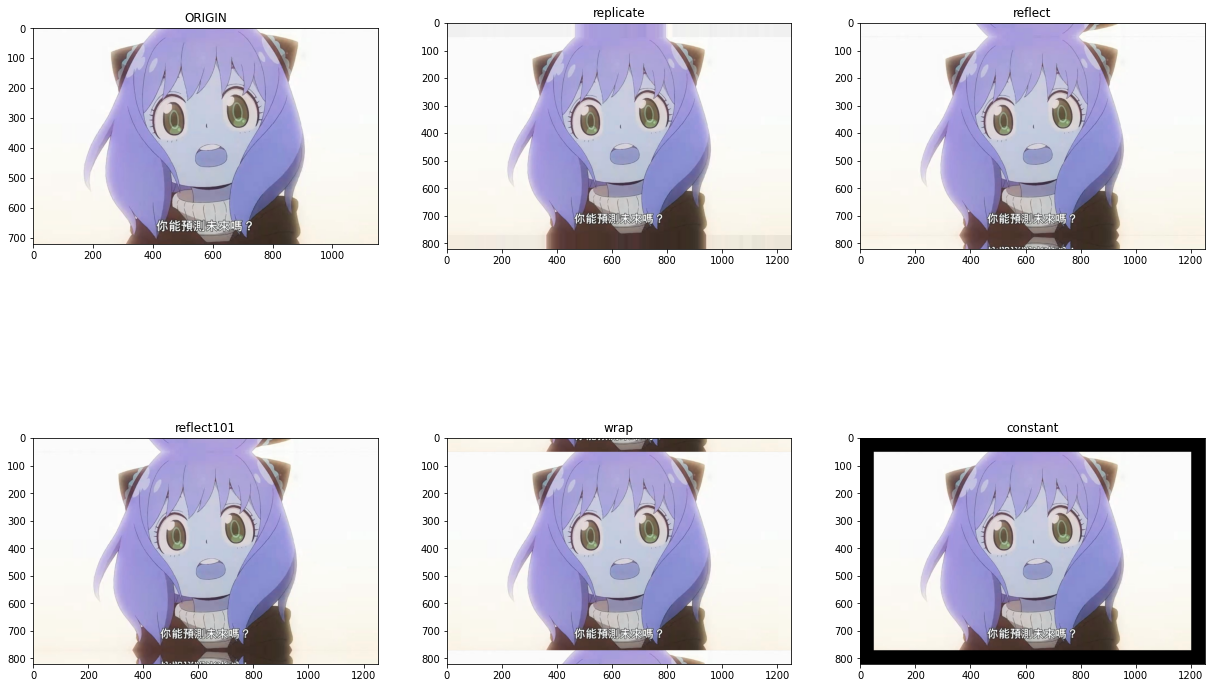

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=[21,14])
plt.subplot(231),plt.imshow(img,'gray'),plt.title('ORIGIN')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('replicate')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('reflect')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('reflect101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('wrap')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('constant')
plt.show()

replicate:复制法

reflect：反射法

reflect101：更加真实的反射法

wrap：外包装法

constant：常数填充法

### 数值计算

In [20]:
img1 = cv2.imread("Ania.jpg")
img2 = cv2.imread("Ania.png")

#### 加法

OpencCV的加法与numpy的加法有区别，opencv的加法是涵盖模运算，即超过255时会对256取模，而numpy的加法超过255后会取255

In [21]:
img_1 = img1 + 10
img_1[:5,:,0]

array([[179, 176, 174, ..., 175, 179, 179],
       [178, 175, 173, ..., 174, 178, 178],
       [176, 174, 171, ..., 173, 176, 176],
       [175, 172, 170, ..., 171, 175, 175],
       [174, 172, 169, ..., 171, 175, 175]], dtype=uint8)

In [22]:
img1[:5,:,0]

array([[169, 166, 164, ..., 165, 169, 169],
       [168, 165, 163, ..., 164, 168, 168],
       [166, 164, 161, ..., 163, 166, 166],
       [165, 162, 160, ..., 161, 165, 165],
       [164, 162, 159, ..., 161, 165, 165]], dtype=uint8)

可以发现，加法相当于会对256取余数

In [23]:
cv2.add(img1,img_1)[:5,:,0]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

add函数到255后不再取余，而是直接取255

#### 图像融合
$$
dst = \alpha*img1+\beta*img2+\gamma
$$

In [24]:
img1 = cv2.imread("Ania.jpg")
img2 = cv2.imread("night.jpg")

In [25]:
img1+img2

ValueError: operands could not be broadcast together with shapes (383,474,3) (360,360,3) 

可以发现形状不同无法直接相加

In [26]:
img1.shape

(383, 474, 3)

In [27]:
img2.shape

(360, 360, 3)

In [28]:
img1 = cv2.resize(img1,(360,360))
img1.shape

(360, 360, 3)

In [29]:
cv2.imshow("img",img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

按权重相加，必须要有偏置项

In [35]:
res = cv2.addWeighted(img1,0.4,img2,0.6,0)

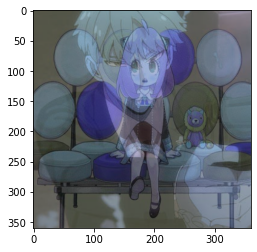

In [36]:
plt.imshow(res)

resize函数另一种操作方法,fx,fy代表拉伸比例

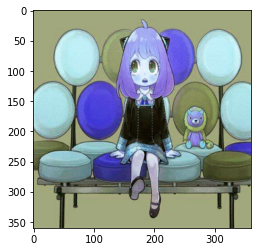

In [39]:
ano = cv2.resize(img1,(0,0),fx=1,fy=1)
plt.imshow(ano)

#### 位运算

包括与或非、抑或运算

比如说，我想混合两个图像，但是如果直接添加，会改变颜色；如果混合，会产生透明的效果。这个时候，我们可以用位运算

一步一步来，首先我们可以通过掩膜(mask)来对图像的ROI进行操作

In [7]:
import matplotlib.pyplot as plt

In [4]:
# Load two images
img1 = cv2.imread('Ania.jpg')
img2 = cv2.imread('night.jpg')

In [10]:
mask = np.zeros(img1.shape,dtype=np.uint8)
mask[50:175,175:325] = 255
cv2.imshow("mask",mask)
cv2.waitKey(0)

-1

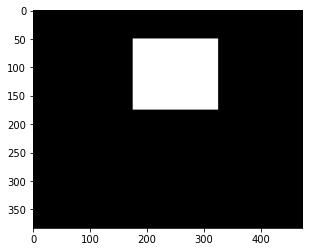

In [11]:
plt.imshow(mask)

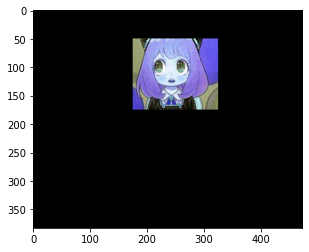

In [12]:
after_mask = cv2.bitwise_and(img1,mask)
plt.imshow(after_mask)

In [13]:
mask.shape

(383, 474, 3)

现在我们来进行图像的拼接

In [14]:
# 读取图像
img1 = cv2.imread('Ania.jpg')
img2 = cv2.imread('night.jpg')
# 首先确定拼接的区域，我们选择左上角
rows,cols,channels = img2.shape
roi = img1[50:175,175:325]
# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY) #阈值函数，大于10为255，否则为0
mask_inv = cv2.bitwise_not(mask)
# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)
# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst
cv2.imshow('res',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

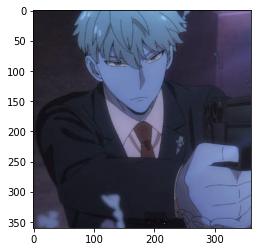

In [23]:
plt.imshow(dst)